<a href="https://colab.research.google.com/github/oscode04/AgriVision/blob/machine-learning/AgriVision_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Library**

In [112]:
!pip uninstall tensorflow

Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Would remove:
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.18.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? y
  Successfully uninstalled tensorflow-2.18.0


In [113]:
!pip install tensorflow==2.15.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: tensorboard
    Found existing installation:

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer


# **Load data**

In [3]:
df = pd.read_csv("/content/combined_dataset.csv")

# **Data Preprocessing**

**Dataset Checking**

In [4]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [5]:
# drop column not used
df.drop('Moisture', axis=1, inplace=True)

In [6]:
df.head()

,Temparature,Humidity,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,Sandy,Maize,37,0,0,Urea
1,29,52,Loamy,Sugarcane,12,0,36,DAP
2,34,65,Black,Cotton,7,9,30,14-35-14
3,32,62,Red,Tobacco,22,0,20,28-28
4,28,54,Clayey,Paddy,35,0,0,Urea


**Check the name of**


*   Crop Type
*   Soil Type
* Fertilizer Name



In [7]:
print("Crop Type: ")
print(df["Crop Type"].unique())
print("-----------------------------------------------------------------------------")
print("Soil Type: ")
print(df["Soil Type"].unique())
print("-----------------------------------------------------------------------------")
print("Fertilize Name: ")
print(df["Fertilizer Name"].unique())


Crop Type: 
['Maize' 'Sugarcane' 'Cotton' 'Tobacco' 'Paddy' 'Barley' 'Wheat' 'Millets'
 'Oil seeds' 'Pulses' 'Ground Nuts' 'rice' 'pomegranate' 'coffee'
 'watermelon' 'kidneybeans' 'orange']
-----------------------------------------------------------------------------
Soil Type: 
['Sandy' 'Loamy' 'Black' 'Red' 'Clayey']
-----------------------------------------------------------------------------
Fertilize Name: 
['Urea' 'DAP' '14-35-14' '28-28' '17-17-17' '20-20' '10-26-26' 'TSP'
 'Superphosphate' 'Potassium sulfate.' 'Potassium chloride' '15-15-15'
 '14-14-14' '10-10-10']


**Encode Categorical Features**

In [15]:
# # One-hot encode categorical features
# categorical_features = ['Soil Type', 'Crop Type']
# encoder = OneHotEncoder(sparse_output=False)
# encoded_features = encoder.fit_transform(df[categorical_features])

# # Combine one-hot encoded features with numerical features
# X = np.hstack((df[['Nitrogen', 'Phosphorous', 'Potassium', 'Temparature', 'Humidity']].values, encoded_features))

# # Encode target labels
# fertilizer_encoder = OneHotEncoder(sparse_output=False)
# y = fertilizer_encoder.fit_transform(df[['Fertilizer Name']])

# # Split data into training (X, y)
# X_train, y_train = X, y

In [20]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
df["Soil Type"] = encode_soil.fit_transform(df["Soil Type"])

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Black,0
Clayey,1
Loamy,2
Red,3
Sandy,4


In [21]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
df["Crop Type"] = encode_soil.fit_transform(df["Crop Type"])

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
Barley,0
Cotton,1
Ground Nuts,2
Maize,3
Millets,4
Oil seeds,5
Paddy,6
Pulses,7
Sugarcane,8


In [22]:
#encoding Soil Type variable
encode_soil = LabelEncoder()

#fitting the label encoder
df["Fertilizer Name"] = encode_soil.fit_transform(df["Fertilizer Name"])

#creating the DataFrame
Soil_Type = pd.DataFrame(zip(encode_soil.classes_,encode_soil.transform(encode_soil.classes_)),columns=['Original','Encoded'])
Soil_Type = Soil_Type.set_index('Original')
Soil_Type

,Encoded
Original,
10-10-10,0
10-26-26,1
14-14-14,2
14-35-14,3
15-15-15,4
17-17-17,5
20-20,6
28-28,7
DAP,8


In [23]:
df.head()

,Temparature,Humidity,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,4,3,37,0,0,13
1,29,52,2,8,12,0,36,8
2,34,65,0,1,7,9,30,3
3,32,62,3,9,22,0,20,7
4,28,54,1,6,35,0,0,13


In [28]:
# Define features and target
X = df[['Nitrogen', 'Phosphorous', 'Potassium', 'Temparature', 'Humidity', 'Soil Type', 'Crop Type']]
y = df['Fertilizer Name']


In [29]:
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               3584      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 14)                910       
                                                                 
Total params: 12750 (49.80 KB)
Trainable params: 12750 (49.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [91]:
# encoder = LabelBinarizer()
# y_encoded = encoder.fit_transform(y)

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
19/19 [==============================] - 2s 48ms/step - loss: 3.2477 - accuracy: 0.3372 - val_loss: 5.2314 - val_accuracy: 0.0000e+00
Epoch 2/10
19/19 [==============================] - 0s 6ms/step - loss: 1.5612 - accuracy: 0.5802 - val_loss: 2.9672 - val_accuracy: 0.4079
Epoch 3/10
19/19 [==============================] - 0s 6ms/step - loss: 0.9652 - accuracy: 0.7570 - val_loss: 2.2696 - val_accuracy: 0.5461
Epoch 4/10
19/19 [==============================] - 0s 6ms/step - loss: 0.7335 - accuracy: 0.7934 - val_loss: 1.7651 - val_accuracy: 0.6447
Epoch 5/10
19/19 [==============================] - 0s 9ms/step - loss: 0.5969 - accuracy: 0.8132 - val_loss: 1.5822 - val_accuracy: 0.6842
Epoch 6/10
19/19 [==============================] - 0s 9ms/step - loss: 0.5362 - accuracy: 0.8496 - val_loss: 1.3302 - val_accuracy: 0.6447
Epoch 7/10
19/19 [==============================] - 0s 7ms/step - loss: 0.4398 - accuracy: 0.8579 - val_loss: 1.0688 - val_accuracy: 0.7434
Epoch 8/10
19/1

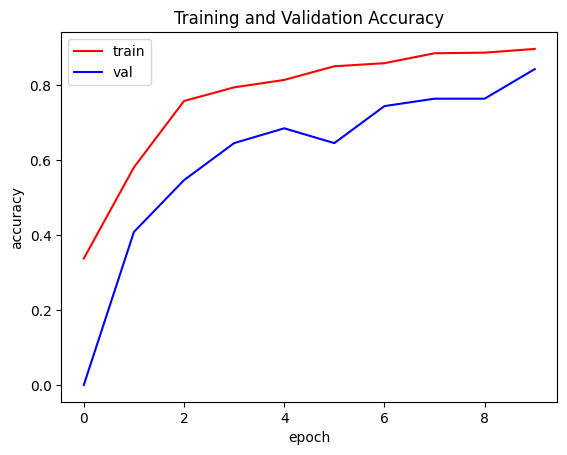

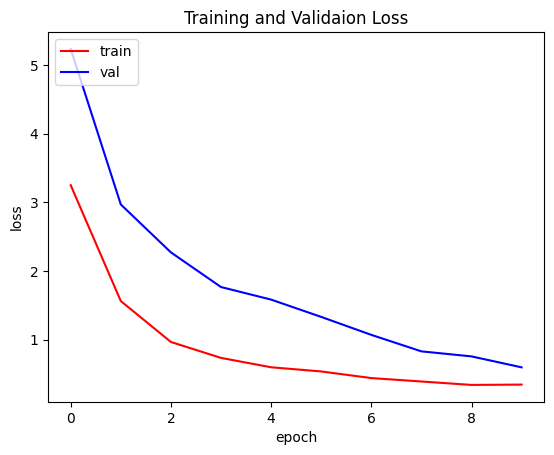

In [33]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

In [35]:
# test_loss, test_acc = model.evaluate(X_test, y_test)
# print(f"Test accuracy: {test_acc}")

In [36]:
# Define the save path with the .keras extension
save_path = 'saved_model/my_model-2.keras'

# Save the model in the Keras format
model.save(save_path)


In [44]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Load the saved model
model = tf.keras.models.load_model('/content/saved_model/my_model-2.keras')

# Encoders (must match the training setup)
soil_types = ['Sandy', 'Loamy', 'Black', 'Red', 'Clayey']
crop_types = ['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley', 'Wheat', 'Millets',
              'Oil seeds', 'Pulses', 'Ground Nuts', 'rice', 'pomegranate', 'coffee', 'watermelon',
              'kidneybeans', 'orange']
fertilizer_names = ['10-10-10', '10-26-26', '14-14-14', '14-35-14', '15-15-15',
                    '17-17-17', '20-20', '28-28', 'DAP', 'Potassium chloride',
                    'Potassium sulfate', 'Superphosphate', 'TSP', 'Urea']

# Initialize the label encoders
label_encoder_soil = LabelEncoder()
label_encoder_crop = LabelEncoder()
fertilizer_encoder = LabelEncoder()

# Fit encoders with the same categories used in training
label_encoder_soil.fit(soil_types)
label_encoder_crop.fit(crop_types)
fertilizer_encoder.fit(fertilizer_names)

# Initialize OneHotEncoders for categorical features
# Assuming these were used during training
onehot_encoder_soil = OneHotEncoder(sparse_output=False, handle_unknown='ignore')  # sparse=False for numpy array
onehot_encoder_crop = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit OneHotEncoders with the categories used during training
onehot_encoder_soil.fit(label_encoder_soil.transform(soil_types).reshape(-1, 1))
onehot_encoder_crop.fit(label_encoder_crop.transform(crop_types).reshape(-1, 1))


# Function to preprocess user input
def preprocess_input(N, P, K, temperature, humidity, soil_type, crop_type):
    # Transform categorical features to one-hot encoding (using pre-trained encoder)
    soil_encoded = label_encoder_soil.transform([soil_type])  # Encode soil type
    crop_encoded = label_encoder_crop.transform([crop_type])  # Encode crop type
    soil_onehot = onehot_encoder_soil.transform(soil_encoded.reshape(-1, 1)) # One-hot encode soil
    crop_onehot = onehot_encoder_crop.transform(crop_encoded.reshape(-1, 1)) # One-hot encode crop

    # Combine numerical and encoded features
    input_data = np.hstack([N, P, K, temperature, humidity, soil_onehot.flatten(), crop_onehot.flatten()])
    return input_data.reshape(1, -1)  # Reshape for model input (1, 51)

# Example of test input data
# Example of test input data
test_data = preprocess_input(
    N=22,  # Nitrogen value
    P=20,  # Phosphorous value
    K=0,  # Potassium value
    temperature=32,  # Temperature value
    humidity=62,  # Humidity value
    soil_type='Red',  # Soil type (categorical)
    crop_type='Tobacco'  # Crop type (categorical)
)

# Make the prediction
prediction = model.predict(test_data)

# Decode the prediction from one-hot encoding back to the class (fertilizer name)
predicted_class = np.argmax(prediction, axis=1)[0]
fertilizer_name = fertilizer_encoder.inverse_transform([predicted_class])

# Output the predicted fertilizer name
print(f"Predicted Fertilizer: {fertilizer_name[0]}")

1/1 [==============================] - 0s 56ms/step
Predicted Fertilizer: 28-28
